# Session practica: Exploratory Data Analysis (EDA) - Temperature

The main purpose of EDA is to help look at data before making any assumptions. It can help to:
- identify obvious errors,
- understand patterns,
- detect outliers or anomalous events, 
- find relations among the variables.

In [2]:
## Importing Libraries 

# Base libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Default options 
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Dataset

- Path: `../data/temperature-AM/`

In [3]:
# Set the data path 
DATA_PATH="../data/temperature-AM/"
DATA_FILE="temperature.csv"
print(os.listdir(DATA_PATH))
# read the datafile
df = pd.read_csv(DATA_PATH + DATA_FILE)

['Temperature.csv']


## Data overview

In [4]:
## Quick exploration
# Dataset dimensions
print("dataset:", df.shape[0],"rows,", df.shape[1], "columns")

dataset: 3782 rows, 7 columns


In [5]:
df.head(5)

,BCDrop_R2_C0,BCDrop_R1_C0,XOverRow2_R3_C0,XOverEWMARow2_R3_C0,XOverEWMARow1_R3_C0,XOverEWMARow1_R4_C0,class
0,0.00,0.30,11.60,-0.72,-1.08,0.82,1
1,0.10,0.00,11.20,-1.07,-0.84,1.35,1
2,0.00,0.10,11.40,-0.82,-0.80,0.90,1
3,0.10,0.40,11.50,-0.69,-0.85,0.38,1
4,0.00,0.70,12.50,0.30,-0.43,-0.21,1


In [6]:
df.tail(5)

,BCDrop_R2_C0,BCDrop_R1_C0,XOverRow2_R3_C0,XOverEWMARow2_R3_C0,XOverEWMARow1_R3_C0,XOverEWMARow1_R4_C0,class
3777,2.30,21.40,12.10,-2.23,-23.01,-15.74,0
3778,4.20,27.80,26.60,2.89,-24.01,-20.11,0
3779,2.00,22.30,8.50,-2.55,-21.22,-16.42,0
3780,11.20,33.70,7.40,-9.54,-25.22,-23.34,0
3781,6.50,33.00,-4.40,-6.24,-21.79,-18.15,0


### Variables

<img width="300" alt="image" src="https://sciencenotes.org/wp-content/uploads/2020/05/IndependentDependent-1024x683.png">

#### Independent Variable 

*aka:* `Feature, Independent, Input, Column, Predictor, Explanatory`

Other variables that are assumed to influence the dependent variable.

#### Dependent Variable

*aka:* `Target, Dependent, Output, Response`

#### Variables types

- `Numeric Variables`: temperature, age, square footage, price, etc.
- `Categorical Variables` (Nominal, Ordinal): gender (nominal), survival status (nominal), football teams (nominal), educational level (ordinal)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782 entries, 0 to 3781
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BCDrop_R2_C0         3782 non-null   float64
 1   BCDrop_R1_C0         3782 non-null   float64
 2   XOverRow2_R3_C0      3782 non-null   float64
 3   XOverEWMARow2_R3_C0  3782 non-null   float64
 4   XOverEWMARow1_R3_C0  3782 non-null   float64
 5   XOverEWMARow1_R4_C0  3782 non-null   float64
 6   class                3782 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 207.0 KB
None


### Null values

In [8]:
# Check for null values
df.isnull().any()

BCDrop_R2_C0           False
BCDrop_R1_C0           False
XOverRow2_R3_C0        False
XOverEWMARow2_R3_C0    False
XOverEWMARow1_R3_C0    False
XOverEWMARow1_R4_C0    False
class                  False
dtype: bool

### Duplicates

In [9]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
# df.drop_duplicates(inplace=True)

0

## Descriptive Statistics  


In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BCDrop_R2_C0,3782.00,0.74,3.23,0.00,0.00,0.10,0.40,48.10
BCDrop_R1_C0,3782.00,1.04,4.45,0.00,0.00,0.00,0.50,85.20
XOverRow2_R3_C0,3782.00,17.94,8.58,-37.00,13.90,18.90,23.40,46.80
XOverEWMARow2_R3_C0,3782.00,0.21,2.98,-16.80,-0.72,0.00,0.67,22.51
XOverEWMARow1_R3_C0,3782.00,0.14,5.47,-44.31,-1.03,-0.15,0.82,33.46
XOverEWMARow1_R4_C0,3782.00,-0.01,4.73,-43.92,-1.13,-0.13,1.11,28.42
class,3782.00,0.98,0.13,0.00,1.00,1.00,1.00,1.00


## Target variable

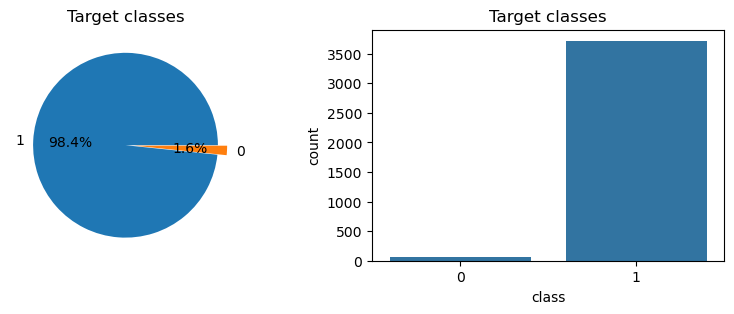

In [11]:
fig,axes = plt.subplots(1,2,figsize=(10,3))
df['class'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=[0,0.1], ax=axes[0]).set_title('Target classes');
axes[0].set_title('Target classes')
axes[0].set_ylabel('')
sns.countplot(data = df ,x='class', ax=axes[1])
axes[1].set_title('Target classes')
plt.show()

## Feature analysis

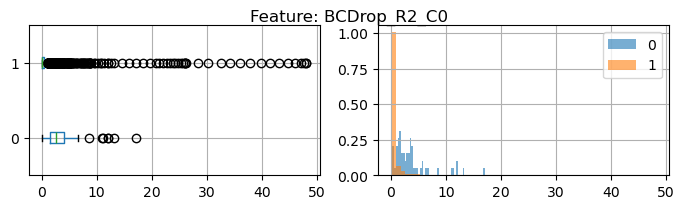

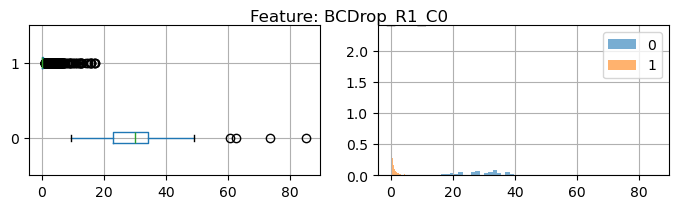

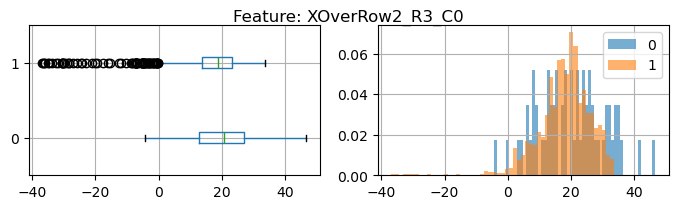

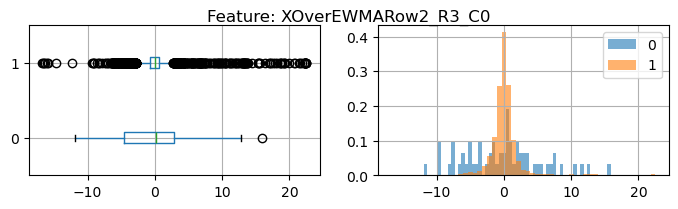

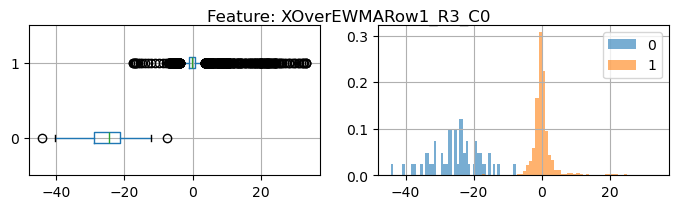

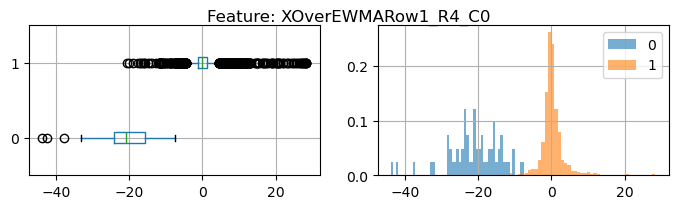

In [12]:

# Function to print histogram of numerical features 
def plot_feature(dataframe, col_name):
    """
    Helper function to plot a feature by class (negative and positive)
    
    Args:
        dataframe (dataframe): data source as dataframe
        col_name (numeric): colunm name (feature)
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
    dataframe.groupby('class')[col_name].hist(bins=55, alpha=.6, density=True, ax=axes[1])
    axes[1].legend(['0','1'])
    dataframe.boxplot(col_name, by="class", ax=axes[0], vert=False)
    axes[0].set_title("")
    axes[0].set_ylabel("")
    fig.suptitle('Feature: ' + col_name)
    plt.show()

# Excluding the target variable
cols = [col for col in df.columns if "class" not in col]

for feature in cols:
    plot_feature(df,feature)


## Correlation between features

- `POSITIVE CORRELATION`: If an increase in feature A leads to increase in feature B, then they are **positively correlated**. A value 1 means perfect positive correlation.
- `NEGATIVE CORRELATION`: If an increase in feature A leads to decrease in feature B, then they are **negatively correlated**. A value -1 means perfect negative correlation.

        Attention: Lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

*Note: Only numeric features*

<Axes: >

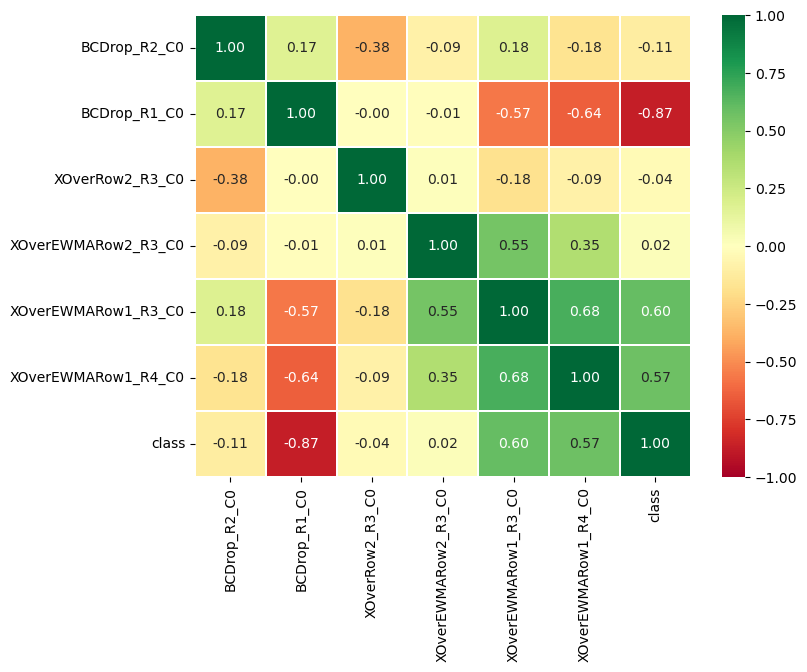

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(data = df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,
            vmin=-1, vmax=1, fmt=".2f")

## Multivariate analysis

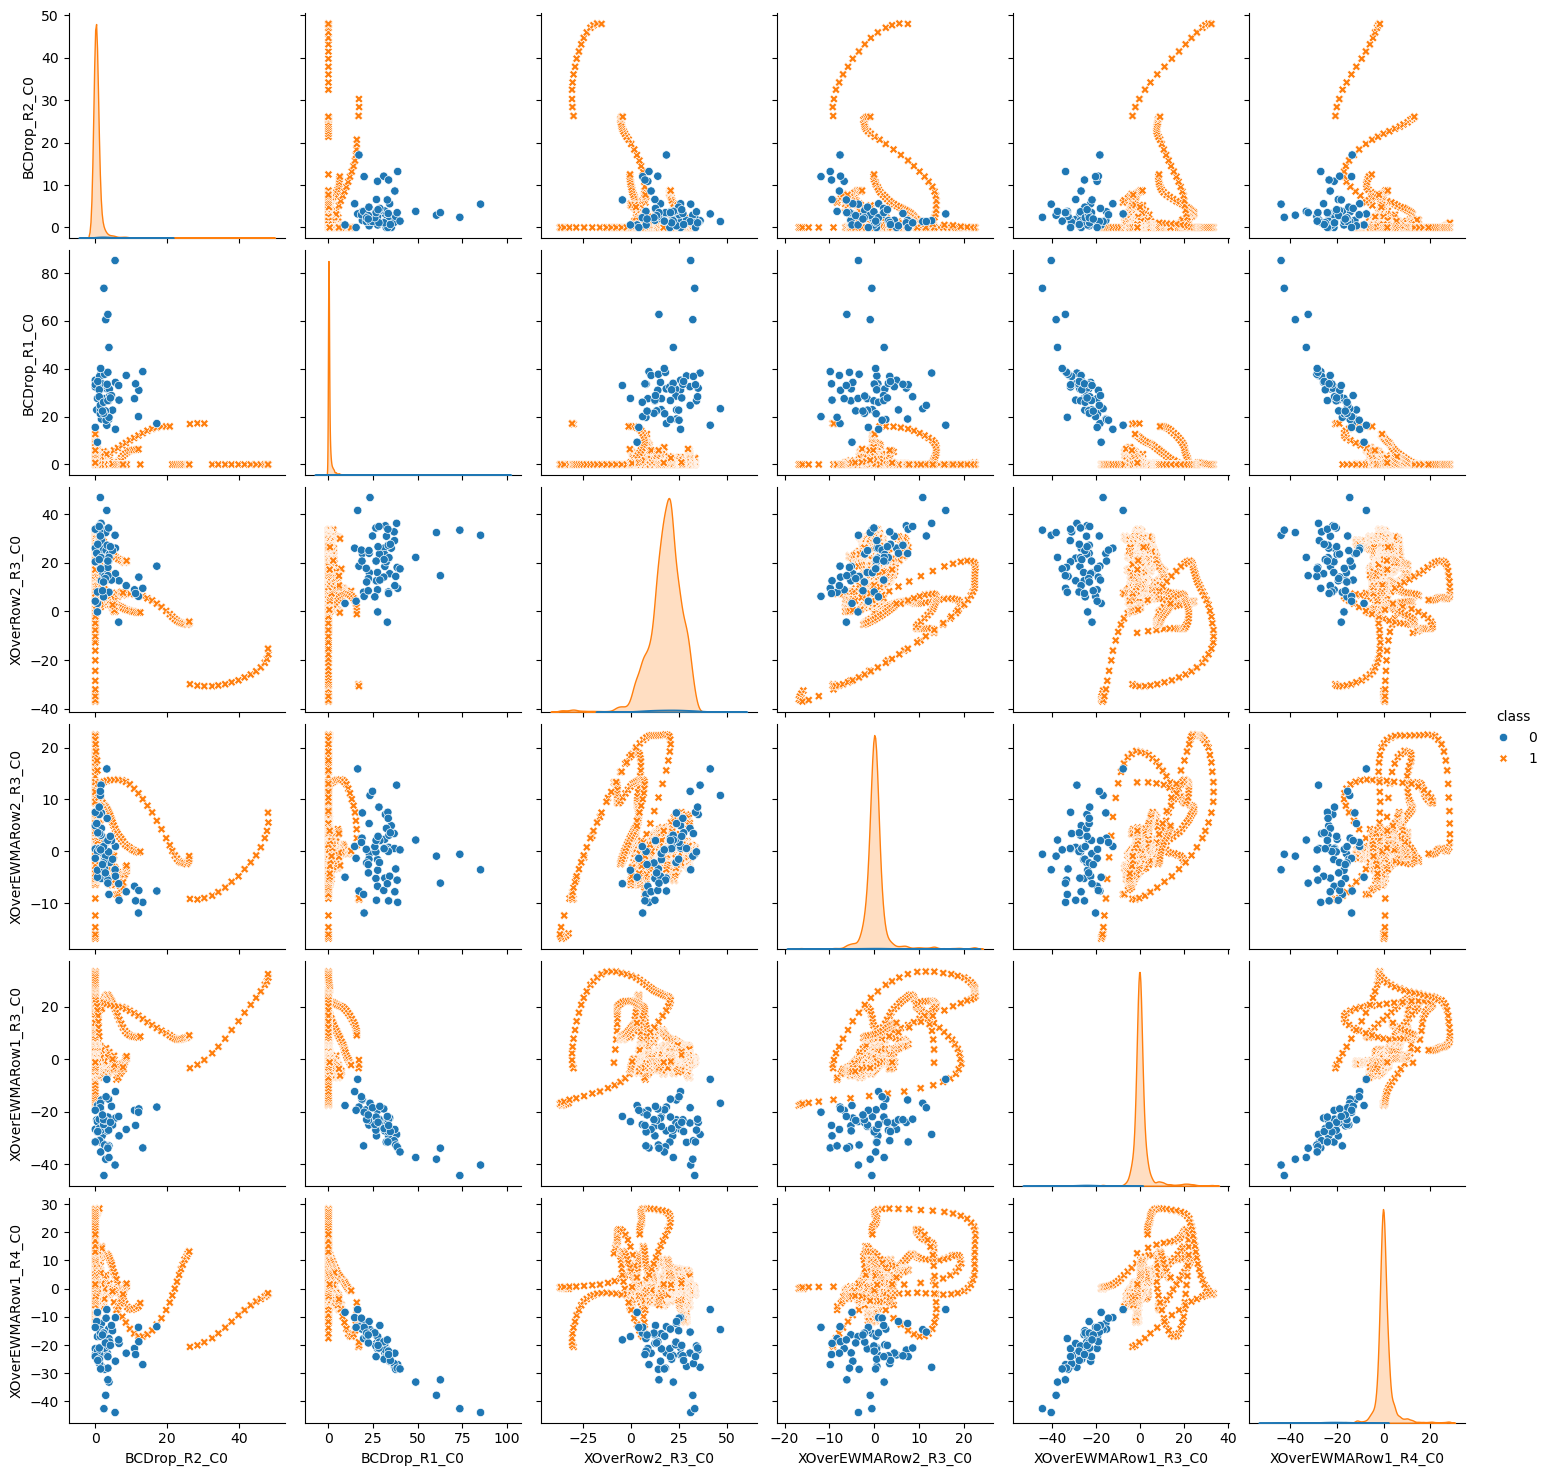

In [14]:
sns.pairplot(data=df,hue="class",markers=["o","X"])

## Outliers

An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects.

<img width="300" alt="image" src="https://www.researchgate.net/publication/353410712/figure/fig1/AS:1048732418203648@1627048701501/Removal-of-outliers-using-IQR-method.png">

Inter-Quartile Range

```
IQR = Q3 - Q1
```

To detect the outliers using this method, we define a new range, let’s call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with. The range is as given below:

```
Lower Bound: (Q1 - 1.5 * IQR)
Upper Bound: (Q3 + 1.5 * IQR)
```
Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier.

In [15]:
df.columns

Index(['BCDrop_R2_C0', 'BCDrop_R1_C0', 'XOverRow2_R3_C0',
       'XOverEWMARow2_R3_C0', 'XOverEWMARow1_R3_C0', 'XOverEWMARow1_R4_C0',
       'class'],
      dtype='object')

In [16]:
def get_outliers(df_in, col_name):
    threshold = 3
    # Calculate mean and standard deviation for selected features
    mean = df_in[col_name].mean()
    std  = df_in[col_name].std()
    # Calculate Z-scores for selected features
    df_in['z_scores'] = ((df_in[col_name] - mean) / std)

    lower_bound  = mean - (threshold * std)
    upper_bound = mean + (threshold * std)
    print("lower bound:" , lower_bound, "; upper bound:", upper_bound)
    df_idx =  (df_in['z_scores'] < lower_bound) | (df_in['z_scores'] > upper_bound)
    return df_idx


outliers_ids=get_outliers(df, 'BCDrop_R1_C0' )

df[outliers_ids]

lower bound: -12.323237911582652 ; upper bound: 14.394364299737067


,BCDrop_R2_C0,BCDrop_R1_C0,XOverRow2_R3_C0,XOverEWMARow2_R3_C0,XOverEWMARow1_R3_C0,XOverEWMARow1_R4_C0,class,z_scores
3740,5.50,85.20,31.30,-3.55,-40.32,-43.92,0,18.90
3745,2.40,73.60,33.40,-0.56,-44.31,-42.55,0,16.30
